# Profile and behavior of users of the Bay Wheels bike share service

## by Mayke Ilzu

## Investigation Overview

In this analysis I wanted to understand the profile and behavior of Bay Wheels users, which is a regional public bicycle sharing system. For this, I focused on the understanding of: user type, gender and day of week that the service was used. Some features served as support to understand the aforementioned focus, such as: trip duration, user age and trip start and end hour.


## Dataset Overview

The data consisted of 183412 trip records, containing features that can be divided into three types of information: Route, Location and Customers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_bay_clean = pd.read_csv('C:/git-repository/data-analyst-nanodegree/projects/project-5-communicate-data-findings/data/201902-fordgobike-tripdata_cleaned.csv')

#Update data type
df_bay_clean['start_time'] = df_bay_clean['start_time'].astype('datetime64')
df_bay_clean['end_time'] = df_bay_clean['end_time'].astype('datetime64')
df_bay_clean['member_birth_year'] = df_bay_clean['member_birth_year'].astype('Int64')
df_bay_clean['user_type'] = df_bay_clean['user_type'].astype('category')
df_bay_clean['member_gender'] = df_bay_clean['member_gender'].astype('category')
df_bay_clean['bike_share_for_all_trip'] = df_bay_clean['bike_share_for_all_trip'].astype('category')
df_bay_clean['duration_min'] = df_bay_clean['duration_min'].astype('float64')
order = df_bay_clean['end_hour'].unique()
order = np.sort(order)
df_bay_clean['start_hour'] = pd.Categorical(df_bay_clean["start_hour"], categories = order)
df_bay_clean['end_hour'] = pd.Categorical(df_bay_clean["end_hour"], categories = order)
week_categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_bay_clean['start_day_of_week'] = pd.Categorical(df_bay_clean["start_day_of_week"], categories = week_categories)
df_bay_clean['end_day_of_week'] = pd.Categorical(df_bay_clean["end_day_of_week"], categories = week_categories)

df_bay_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,start_hour,end_hour,start_day_of_week,end_day_of_week
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,47,26.0,23,0,Thursday,Friday
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,62,30.0,23,0,Thursday,Friday
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,38,19.0,23,0,Thursday,Friday
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,32,27.0,23,0,Thursday,Friday
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,33,26.0,23,0,Thursday,Friday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the profile of the users ?

When investigating the data, we noticed that the largest share of users are subscribers. Only **9.3%** of customers who used the service are **occasional customers**.

Users are **mostly male**, but this may not be a particularity of service users, since we do **not know the gender distribution in the city**.

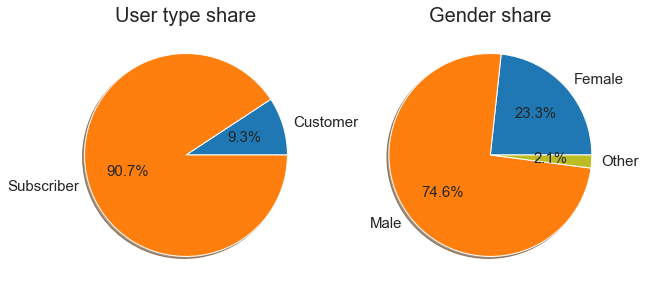

In [44]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)

total = df_bay_clean.count()['duration_sec']
df_group = df_bay_clean.groupby('user_type').count()['duration_sec'].reset_index()
df_group['pct'] = df_group['duration_sec'] / total * 100
labels = df_group['user_type']
sizes = df_group['pct']
colors = ['tab:blue','tab:orange','tab:olive']
plt.pie(x=sizes, autopct="%.1f%%", labels=labels,textprops={'fontsize': 15},shadow=True, colors=colors)
plt.title("User type share", fontsize=20);

plt.subplot(1, 2, 2)

total = df_bay_clean.count()['duration_sec']
df_group = df_bay_clean.groupby('member_gender').count()['duration_sec'].reset_index()
df_group['pct'] = df_group['duration_sec'] / total * 100
labels = df_group['member_gender']
sizes = df_group['pct']
plt.pie(x=sizes, autopct="%.1f%%", labels=labels,textprops={'fontsize': 15},shadow=True, colors=colors)
plt.title("Gender share", fontsize=20);

## What are the times when the service is most used?
As highlighted in the chart below, we can identify 2 peak times for bike sharing start hour: from 8 am to 9 am and 5 pm to 6 pm. If we evaluate end date the distribution is practically the same as bike sharing usually lasts an average of 9 minutes.

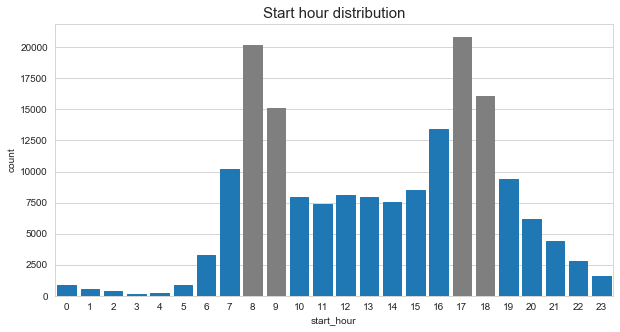

In [48]:
plt.figure(figsize=[10, 5])
ax = sb.countplot(data=df_bay_clean,x='start_hour',color=color)
for bar in ax.patches:
    if bar.get_height() > 15000:
        bar.set_color('tab:gray')    
    else:
        bar.set_color('tab:blue')
plt.title('Start hour distribution',fontsize=15);

## Are the peak times the same for both user types ?

Peak times are very similar between user types, but we can see an interesting behavior: excluding peak times, subscribers tend to use the service more at afternoon than occasional customers, who use more at evening.

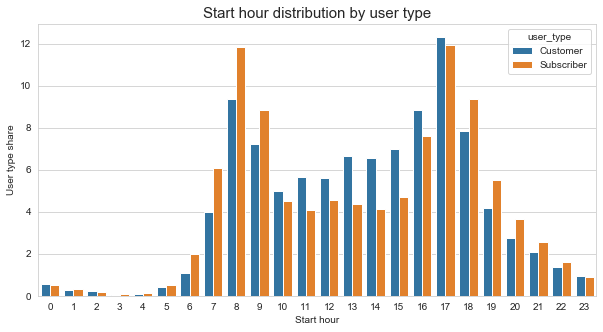

In [47]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','start_hour']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='start_hour',y='duration_sec', hue='user_type')
ax.set_xlabel('Start hour')
ax.set_ylabel('User type share')
plt.title('Start hour distribution by user type',fontsize=15);

## Does the day of the week and time when the service is used vary according to the user type ?

Here we confirm that the peak usage time during the week is practically the same for both types of users. However, there is a difference between the types of users at the weekend: occasional customers use the service more, especially between 10:00 and 17:00. This reinforces the idea that these customers are the ones who most use the service for leisure

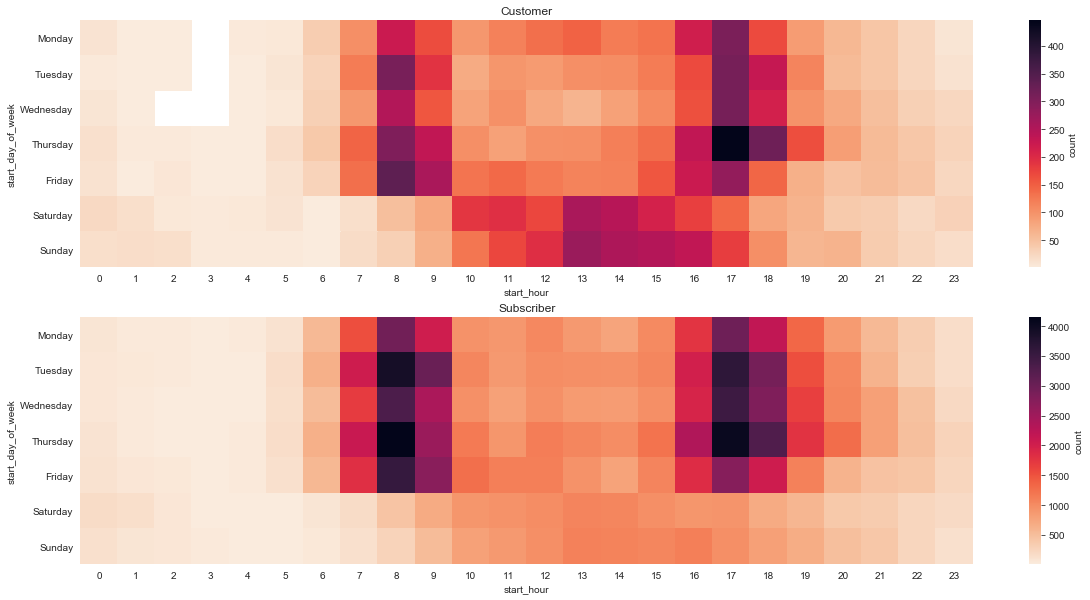

In [49]:
fig, ax = plt.subplots(figsize=[20,10])

plt.subplot(2, 1, 1)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Customer']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Customer')

plt.subplot(2, 1, 2)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Subscriber']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Subscriber');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!